In [1]:
import numpy as np

In [148]:
import matplotlib.pyplot as plt

In [336]:
from matplotlib.colors import ListedColormap

In [337]:
from random import shuffle

In [1192]:
class Perceptron:
    
    def __init__(self):
        self.w = None #vecteur de poids, w[0] contient le biais
        
    def prediction(self,x):
        """une fois le perceptron entraîné, prédit la valeur sur un point"""
        return 1 if (self.w[0] + np.dot(self.w[1:],x) >=0) else -1
    
    def entrainement(self, X, Y, nb_etapes = None, rapport = False):
        """X est un jeu de données d-dimensionnelles (np.arrays)
        Y est l'ensemble des valeurs +1/-1 correspondantes
        Y[i] est la classe de X[i]
        L'algorithme du perceptron va tourner au maximum
        sur le nombre d'étapes données jusqu'à convervence"""
        
        etape = 0 # compteur d'étapes
        en_cours = True
        
        if nb_etapes == None:
            nb_etapes = 10000 # sécurité

        #initialisation des poids à 0
        self.w = np.array([0]*(1+len(X[0])),dtype=float)
            
        while en_cours and etape < nb_etapes:
            #recherche du premier point mal classifié
            i = 0
            while i< len(X) and self.prediction(X[i]) == Y[i]:
                #le point est bien classé
                i += 1
            
            if i==len(X):
                #tous les points sont bien classifiés 
                en_cours = False
                break
            else:
                #X[i] est mal classifié
                
                self.w[0] += Y[i]
                self.w[1:] += Y[i]*X[i]
            etape += 1
        if rapport:
            if etape < nb_etapes:
                print("Nombre d'étapes pour convergence :", etapes)
            else:
                print("pas de convergence")

    def visualisation(self,X,Y,label= "", transformation = None):
        """représente les points de l'échantillon et les
        zones de décision suivant la valeur actuelle de w """
        
        #on récupère les coordoonées minimales et maximales présentes
        #dans X sur les axes x1 et x2
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        #on crée une liste de points qui maillent tout le rectangle
        #defini par les valeurs min et max obtenues
        resolution = 0.1
        abscisses = np.arange(x1_min, x1_max, resolution)
        ordonnees = np.arange(x2_min, x2_max, resolution)
        abs_grille, ord_grille = np.meshgrid(abscisses,ordonnees)
        points = np.array([abs_grille.ravel(), ord_grille.ravel()]).T
        if transformation:
            points = transformation(points)
        #valeurs de classification associées à chaque point
        val_points = np.array([self.prediction(p) for p in points])
        
        #on place les points X de X dans le graphique
        plt.xlim(abs_grille.min(), abs_grille.max())
        plt.ylim(ord_grille.min(), ord_grille.max())
        
        cmap = ListedColormap(['tomato','lightgreen'])
        plt.contourf(abs_grille,ord_grille, val_points.reshape(abs_grille.shape), \
                     cmap=cmap, alpha=1)
        
        plt.scatter(x=X[Y == 1, 0], y=X[Y == 1, 1],
            alpha=1, c='green',
            marker='o', edgecolor='black')
        
        plt.scatter(x=X[Y == -1, 0], y=X[Y == -1, 1],
            alpha=1, c='red',
            marker='o', edgecolor='black')
        plt.title("vert=1, rouge=-1 "+ label)
        
        plt.show()
        
    def taux_erreur(self, X_test, Y_test):
        """renvoie le taux entre 0 et 1 d'erreurs du perceptron
        sur (X_test,Y_test)"""
    
        err = 0
        for i in range(len(X_test)):
            if self.prediction(X_test[i]) != Y_test[i]:
                err += 1
        return float(err)/len(X_test)  
        
    def meilleur_entrainement(self, X, Y, nb_etapes = 1000):
        """idem que entrainement mais garde en mémoire les diffents
        w obtenus et garde au final celui qui a le taux d'erreur
        le plus bas"""
                
        etape = 0 # compteur d'étapes
        en_cours = True
        

        #initialisation des poids à 0
        self.w = np.array([0]*(1+len(X[0])),dtype=float)
        Ws = [np.copy(self.w)]  #va stocker tous les w successifs
        erreurs = [self.taux_erreur(X, Y)]
                    
        while en_cours and etape < nb_etapes:
            #recherche du premier point mal classifié
            i = 0
            while i< len(X) and self.prediction(X[i]) == Y[i]:
                #le point est bien classé
                i += 1
            
            if i==len(X):
                #tous les points sont bien classifiés 
                en_cours = False
                break
            else:
                #X[i] est mal classifié
                
                self.w[0] += Y[i]
                self.w[1:] += Y[i]*X[i]
                
                Ws.append(np.copy(self.w))  #va stocker tous les w successifs
                erreurs.append(self.taux_erreur(X, Y))
            etape += 1
        i = np.array(erreurs).argmin()
        self.w = Ws[i]
    
    

In [1202]:
p = Perceptron()

In [1203]:
X0=np.array([[1,-1],[3,2],[1,3],[-1,1],[1,5],[-1,4],[-2,2]])

In [1204]:
Y0=np.array([-1,-1,-1,-1,1,1,1])

In [1205]:
p.entrainement(X0,Y0)

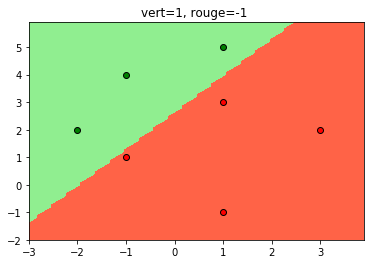

In [1206]:
p.visualisation(X0,Y0)

On mélange les données X et Y simultanément pour constater que les résultats obtenus par le perceptron lors de l'apprentissage sont différents.

In [1207]:
def melanger_donnees(X,Y, seed=None):
    z = list(zip(X,Y))
    shuffle(z)
    X,Y = zip(*z)
    X = np.array(X) ; Y = np.array(Y)
    return X,Y

[-7. -3.  2.]


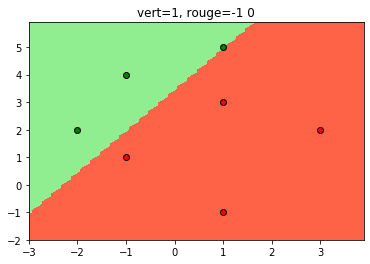

[-7. -3.  2.]


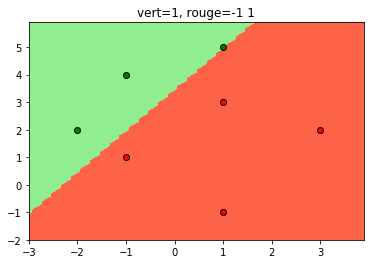

[-5. -2.  2.]


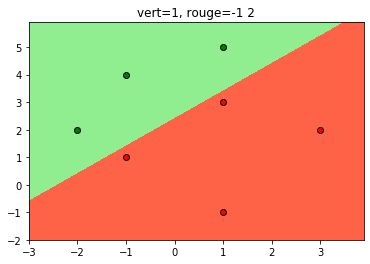

[-3. -1.  1.]


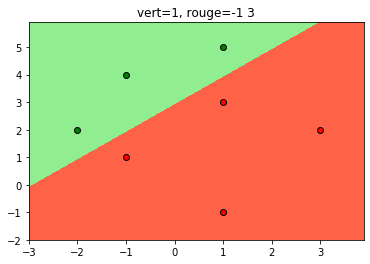

[-9. -4.  4.]


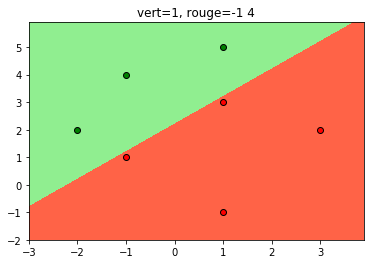

[-5. -2.  2.]


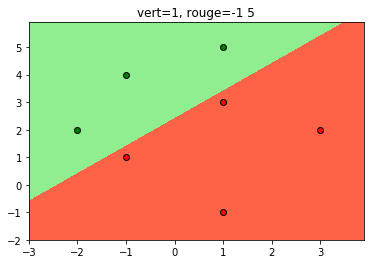

[-9. -4.  4.]


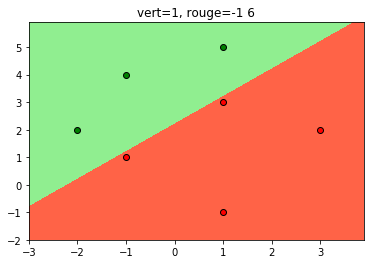

[-9. -4.  3.]


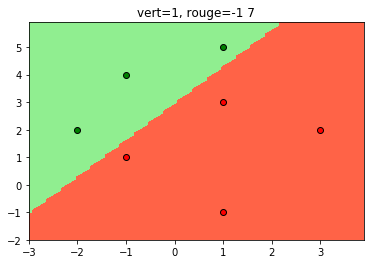

[-7. -3.  3.]


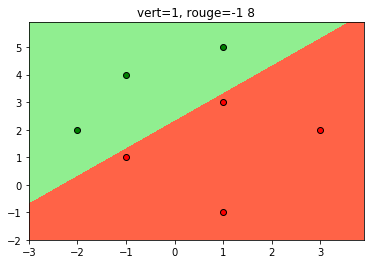

[-6. -2.  2.]


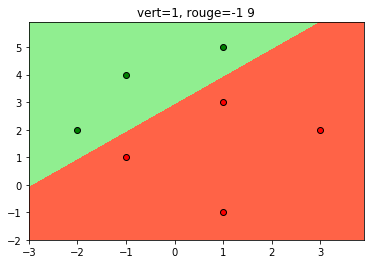

In [1208]:
for i in range(10):
    X1, Y1 = melanger_donnees(X0,Y0)
    p.entrainement(X1,Y1)
    print(p.w)
    p.visualisation(X,Y,str(i))

Utilités pour générer des points ainsi que pour générer une classification linéaire

In [1209]:
def echantillon_rect_uniforme_2D(x1_min, x1_max, x2_min, x2_max, taille_echantillon):
    """renvoie un echantillon iid uniformément dans le rectangle donné"""
    X = np.random.random_sample((taille_echantillon,2))
    X[:,0] = X[:,0]*(x1_max-x1_min) + x1_min
    X[:,1] = X[:,1]*(x2_max-x2_min) + x2_min
    return X

In [1210]:
def classification_lineaire_2D(X,a,b,c):
    """renvoie un vecteur Y de +1 / -1 déterminé par le fait que
    a*x1 + b*x2 + c >=0 ou pour chaque point de X"""
    Y = np.array([1 if a*X[i,0]+b*X[i,1]+c >=0 else -1 for i in range(len(X))])
    return Y

In [1217]:
X2 = echantillon_rect_uniforme_2D(-3,2,-5,4,1000)

In [1221]:
Y2 = classification_lineaire_2D(X2, 1, 1, 1)

In [1222]:
def visualiser_points(X,Y):
        """représente les points de l'échantillon et les
        zones de décision suivant la valeur actuelle de w """
   
        plt.scatter(x=X[Y == 1, 0], y=X[Y == 1, 1],
            alpha=1, c='green',
            marker='o', edgecolor='black')
        
        plt.scatter(x=X[Y == -1, 0], y=X[Y == -1, 1],
            alpha=1, c='red',
            marker='o', edgecolor='black')
        
        plt.show()

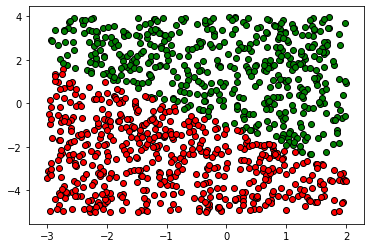

In [1223]:
visualiser_points(X2,Y2)

Estimation du aux d'erreur moyen de généralisation en fonction de la taille de l'échantillon

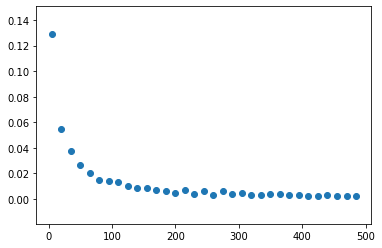

In [1231]:
e = []
repet = 50 #on répète et on moyenne pour diminuer la variance
for s in range(5,len(X_data)-1,15):
    som_err = float(0)
    for r in range(repet):
        X_d, Y_d = melanger_donnees(X2, Y2)
        X_appr, Y_appr = X_d[:s], Y_d[:s]
        X_test, Y_test = X_d[s:], Y_d[s:]
        p.entrainement(X_appr, Y_appr)
        som_err += taux_erreur(p, X_test, Y_test)
    err = som_err/repet
    e.append([s,err])
e = np.array(e)  
plt.scatter(e[:,0],e[:,1])

Test sur des données non séparables

In [1232]:
np.random.seed(2)

In [1239]:
X3 = echantillon_rect_uniforme_2D(-5,5,-5,5,200)

In [1240]:
Y3 = np.array([1 if -2*(X3[i,0])**2 - X3[i,1] + 3 >=0 else -1 for i in range(len(X3))])

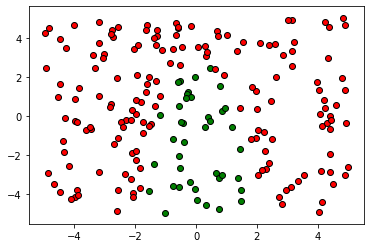

In [1241]:
visualiser_points(X3, Y3)

In [1244]:
p.entrainement(X3,Y3,rapport=True)

pas de convergence


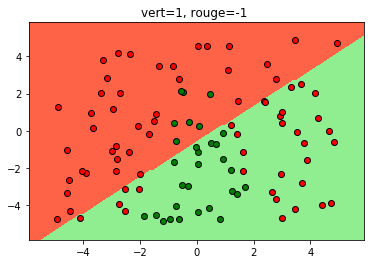

In [1245]:
p.visualisation(X_data, Y_data)

In [1246]:
p.taux_erreur(X3,Y3)

0.34

In [1247]:
p.meilleur_entrainement(X3,Y3)

In [1248]:
p.taux_erreur(X3,Y3)

0.31

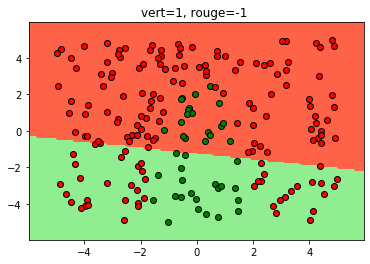

In [1249]:
p.visualisation(X3,Y3) #après le meilleur entrainement

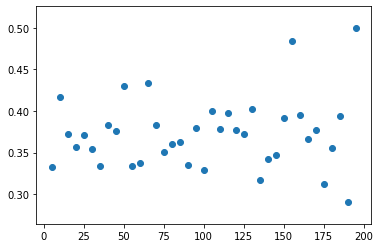

In [1250]:
e = []
repet = 10
for s in range(5,len(X3)-1,5):
    som_err = float(0)
    for r in range(repet):
        X_d, Y_d = melanger_donnees(X3, Y3)
        X_appr, Y_appr = X_d[:s], Y_d[:s]
        X_test, Y_test = X_d[s:], Y_d[s:]
        p.entrainement(X_appr, Y_appr)
        som_err += taux_erreur(p, X_test, Y_test)
    err = som_err/repet
    e.append([s,err])
e = np.array(e)  
plt.scatter(e[:,0],e[:,1])

Augmentation de la dimension

In [1251]:
def quadratisation(X):
    """ajoute les coordonnées quadratiques à l'échantillon 2D"""
    c1 = (X[:,0]**2).reshape(len(X),1)
    c2 = (X[:,1]**2).reshape(len(X),1)
    c3 = (X[:,0] * X[:,1]).reshape(len(X),1)
    return np.concatenate((X,c1,c2,c3),axis=1)

In [1257]:
X3_quad = quadratisation(X3)

In [1258]:
p.entrainement(X3_quad,Y3)

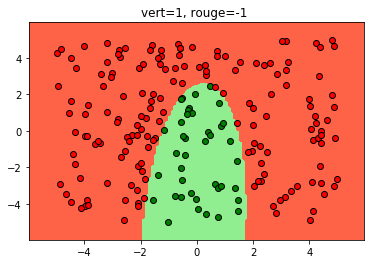

In [1259]:
p.visualisation(X3_quad,Y3,transformation=quadratisation)

In [1260]:
p.taux_erreur(X3_quad,Y3)

0.0

Autre essai pour le fun avec une ellipse

In [1264]:
X4 = echantillon_rect_uniforme_2D(-5,5,-5,5,1000)

In [1291]:
f = lambda x1,x2: 2*x1**2 + x2**2 - 2*x1-2*x2 -5

In [1292]:
Y4 = np.array([1 if f(*X4[i]) >=0 else -1 for i in range(len(X4))])

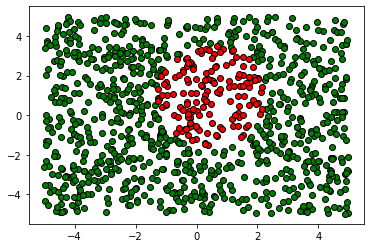

In [1293]:
visualiser_points(X4,Y4)

In [1294]:
X4_quad = quadratisation(X4)

In [1295]:
p.entrainement(X4_quad,Y4)

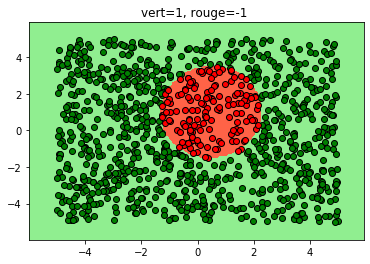

In [1296]:
p.visualisation(X4_quad,Y4,transformation=quadratisation)

répartition non quadratique

In [1310]:
f = lambda x1,x2 : 1 if np.ceil(x1)%2 == 0 else -1

In [1316]:
X5 = echantillon_rect_uniforme_2D(-5,5,-5,5,1000)

In [1317]:
Y5 = np.array([1 if f(*X5[i]) >=0 else -1 for i in range(len(X5))])

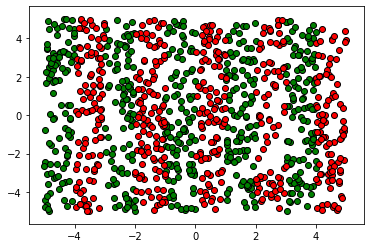

In [1318]:
visualiser_points(X5,Y5)

In [1319]:
p.entrainement(X5,Y5)

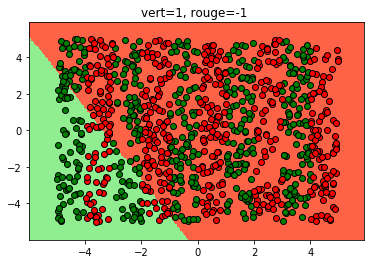

In [1320]:
p.visualisation(X5,Y5)

In [1321]:
taux_erreur(p,X5,Y5)

0.475

In [1329]:
p.meilleur_entrainement(X5,Y5)

In [1330]:
p.taux_erreur(X5,Y5)

0.431

In [1331]:
X5_quad=quadratisation(X5)

In [1334]:
p.meilleur_entrainement(X5_quad,Y5, nb_etapes=5000)

In [1335]:
p.taux_erreur(X5_quad,Y5)

0.45

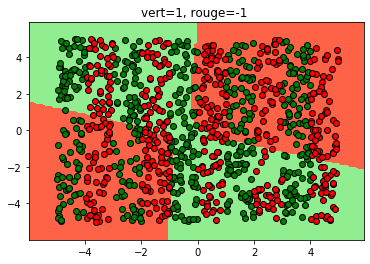

In [1336]:
p.visualisation(X5_quad,Y5,transformation=quadratisation)

encore un

In [1337]:
f = lambda x1,x2 : 1 if x2 - 3*np.sin(x1/1.5) >= 0 else -1

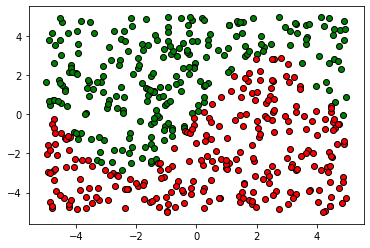

In [1339]:
X6 = echantillon_rect_uniforme_2D(-5,5,-5,5,500)
Y6 = np.array([1 if f(*X6[i]) >=0 else -1 for i in range(len(X6))])
visualiser_points(X6,Y6)

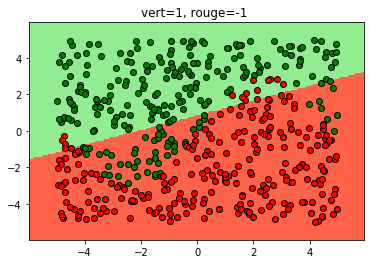

0.144

In [1340]:
p.entrainement(X6,Y6)
p.visualisation(X6,Y6)
p.taux_erreur(X6,Y6)

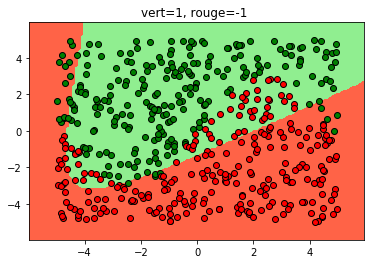

0.168

In [1341]:
p.meilleur_entrainement(quadratisation(X6),Y6, nb_etapes=1000)
p.visualisation(X6,Y6,transformation=quadratisation)
taux_erreur(p,quadratisation(X6),Y6)